# 다중 회귀

In [21]:
# 도미의 길이, 도미의 특성성

bream_length= [25.4,26.3,26.5,29.0,29.0,29.7,29,7,30.0,30.0,30.7,
            31.0,31.0,31.5,32.0,32.0,33.0,33.0,33.5,33.5,34.0,34.0,34.5,
            35.0,35.0,35.0,35.0,36.0,36.0,36.0,37.0,38.5,39.0,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]

# 빙어 데이터

smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,13.4,
                12.2,19.7,19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

from sklearn.model_selection import train_test_split
import numpy as np

fish_length = np.array(fish_length)
fish_weight = np.array(fish_weight)

# test_size를 정하지 않을때 기본 분할 비율 75:25
train_input, test_input, train_target, test_target = train_test_split(fish_length,fish_weight,random_state=42)

# reshape(-1,1): 행의 수는 자동으로 계산, 열은 1개로 고정해서 열벡터로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [22]:
# 판다스로 데이터 준비
import pandas as pd
import numpy as np

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print(perch_full.shape)
print(perch_full)

(56, 3)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.

In [23]:
# 다항 특성 만들기기
from sklearn.preprocessing import PolynomialFeatures

# degree = 2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# x1, x2 에 2,3 이 들어감 -> [1, x1, x2, x1**2, x1*x2, x2**2]
# 1 은 항상 포함
# [1, 2, 3, 2**2 , 2*3 , 3**3 ]
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]


In [24]:
# 훈련 데이터는 fit + transform
# train_scaled = scaler.fit_transform(train_input)  

# 테스트 데이터는 transform만
# test_scaled = scaler.transform(test_input)        

In [25]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

poly.get_feature_names_out()

test_poly = poly.transform(test_input)

(36, 2)


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9363236093906153
0.9348694595374054


# 더 많은 특성 만들기

In [53]:
poly = PolynomialFeatures(degree=5,include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(test_poly.shape)


lr.fit(train_poly, train_target)

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

(36, 5)
(13, 5)
0.9732222780640223
0.9570288892902422


# 규제전에 표준화

In [49]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


# 릿지 회귀

In [ ]:
# L2 규제 -> 릿지

from sklearn.linear_model import Ridge

ridge = Ridge() # alpha = 1
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))


0.9219078167705878
0.9361320545796239


# 릿쏘 적절한 규제 찾기

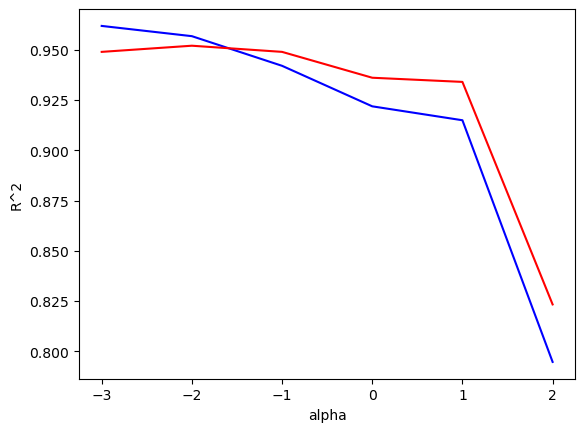

In [56]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
plt.plot(np.log10(alpha_list),train_score,color='blue')
plt.plot(np.log10(alpha_list),test_score,color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()



In [ ]:
# 제일 좋은 규제
ridge = Ridge(alpha=0.01) # alpha = 0.01

ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))


0.9568152863009655
0.9520663351909618


# 랏쏘 회귀

In [ ]:
# 규제 1
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=10000) # alpha = 1
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9355953692894129
0.9455998929350923


c:\Users\hyunsu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.871e+04, tolerance: 3.725e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\hyunsu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.045e+04, tolerance: 3.725e+02
  model = cd_fast.enet_coordinate_descent(


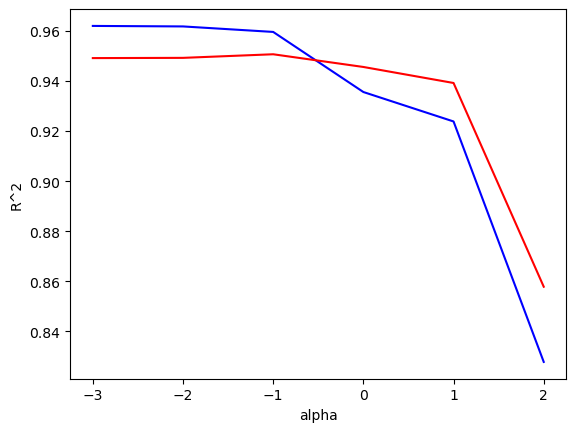

4


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter=10000)
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score,color='blue')
plt.plot(np.log10(alpha_list),test_score,color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

print(np.sum(lasso.coef_==0))

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01,max_iter=10000)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9617882822950857
0.9492369190767017


c:\Users\hyunsu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.045e+04, tolerance: 3.725e+02
  model = cd_fast.enet_coordinate_descent(
